# **Lista 5** 
### Rafał Głodek
***

Zadanie 1

In [2]:
import graphviz, sys

In [3]:
class Vertex():
    def __init__(self, key):
        self.id = key
        self.neighbors = {} 

    def add_neighbor(self, value, weight):
        self.neighbors[value] = weight
    
    def __str__(self):
        return "Node: " + str(self.id) + " Neighbors: " + str([i.id for i in self.neigbors])

    def get_neighbors(self):
        return [i.id for i in self.neighbors]
    
    def get_id(self):
        return self.id
    
    def get_weight(self, neighbor):
        return self.neighbors[neighbor]




In [4]:
from collections import deque

In [12]:
class Graph(Vertex):
    def __init__(self):
        self.vertices = {}
        self.size = 0

    def add_vertex(self, vert_key):
        vertex = Vertex(vert_key)
        self.vertices[vert_key] = vertex
        self.size += 1
        return vertex
    
    def __contains__(self, vert_key):
        return vert_key in self.vertices
    
    def vertex(self, vert_key):
        if vert_key in self.vertices:
            return self.vertices[vert_key]
        else:
            return None
        
    def get_neighbors(self, vert_key):
        if vert_key in self.vertices:
            return self.vertices[vert_key].get_neighbors()
        else:
            return None

    def get_vertices(self):
        return [x for x in self.vertices]
    
    def add_edge(self, from_key, to_key, weight=0):
        if from_key not in self.vertices:
            self.add_vertex(from_key)
        if to_key not in self.vertices:
            self.add_vertex(to_key)
        self.vertices[from_key].add_neighbor(self.vertices[to_key], weight)
    
    def get_edges(self):
        edges = []
        for vert in self.vertices:
            neighbors = self.vertices[vert].get_neighbors()
            if not neighbors is None:
                for n in neighbors:
                    edges.append(str(vert) + str(n))
        return edges
    
    def visualize(self):
        dot = graphviz.Digraph()
        for vert in self.vertices:
            dot.node(str(vert), str(vert))
        for edge in self.get_edges():
            dot.edge(str(edge[0]), str(edge[1]))
        return dot
        
    def bfs(self, start):
        visited = [start]
        q = []
        q.append(start)
        while len(q):
            vert = q.pop()
            neighbors = self.vertices[vert].get_neighbors()
            for neighbor in neighbors:
                if not neighbor in visited:
                    q.append(neighbor)
                    visited.append(neighbor)
        return visited

    def dfs(self, start, visited = []):
        if not start in visited:
            visited.append(start)
        neighbors = self.vertices[start].get_neighbors()
        for neighbor in neighbors:
            if not neighbor in visited:
                self.dfs(neighbor, visited)
        return visited

    def dfs_topological_sort(self, start, stack, visited = []):
        if not start in visited:
            visited.append(start)
        neighbors = self.vertices[start].get_neighbors()
        for neighbor in neighbors:
            if not neighbor in visited:
                self.dfs_topological_sort(neighbor, stack, visited)
        stack.append(start)

    def topological_sort(self):
        visited = []
        stack = []

        for vert in self.get_vertices():
            if not vert in visited:
                self.dfs_topological_sort(vert, stack, visited)
        
        return stack[::-1]

In [13]:
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(4, 7)
g.add_edge(7, 8)
g.add_edge(2,12)

Zadanie 2

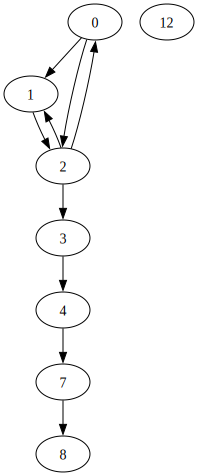

In [17]:
g.visualize()

Zadanie 3

In [14]:
g.bfs(2)

[2, 0, 3, 12, 4, 7, 8, 1]

In [15]:
g.dfs(2)

[2, 0, 1, 3, 4, 7, 8, 12]

Zadanie 4

In [16]:
g.topological_sort()

[0, 1, 2, 12, 3, 4, 7, 8]